In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies=pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [3]:
ratings=pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [6]:
print("Movies Dataset:")
print(movies.info())
print('-'*50)
print("Ratings Dataset:")
print(ratings.info())

Movies Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
None
--------------------------------------------------
Ratings Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB
None


In [13]:
movies.describe(include=['O'])

,title,genres
count,10329,10329
unique,10327,938
top,War of the Worlds (2005),Drama
freq,2,1385


In [14]:
movies[movies['title'].duplicated()]

,movieId,title,genres
6270,26982,Men with Guns (1997),Drama
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [15]:
movies[movies['title']=='Men with Guns (1997)']

,movieId,title,genres
1403,1788,Men with Guns (1997),Action|Drama
6270,26982,Men with Guns (1997),Drama


In [16]:
movies[movies['title']=='War of the Worlds (2005)']

,movieId,title,genres
6662,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [22]:
# Deleting duplicate 'title' rows where genres are less
movies.drop(movies.loc[movies['movieId']==26982].index,inplace=True)
movies.drop(movies[movies['movieId'] == 64997].index, inplace=True)

In [23]:
# Duplicates Deleted
print(movies[movies['title'].duplicated()])

Empty DataFrame
Columns: [movieId, title, genres]
Index: []


In [24]:
#Ratings Dataset Description
ratings['rating'].describe().to_frame()

,rating
count,105339.000000
mean,3.516850
std,1.044872
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [25]:
# Total Users
ratings['userId'].nunique()

668

In [26]:
# Total Movies rated
ratings['movieId'].nunique()

10325

In [27]:
#Exploratory Data Analysis
genres_string = []
for genre in movies.genres:
    x = genre.split('|')
    for i in x:
        if i not in genres_string:
            genres_string.append(i)
genres_string.remove("(no genres listed)")
genres_string = str(genres_string)
genres_string = genres_string[2:-2].replace("', '", ' ')

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud

In [32]:
wordCloud_genre = WordCloud(width=1600, height=900, background_color='black', min_word_length=3, min_font_size=2).generate(genres_string)

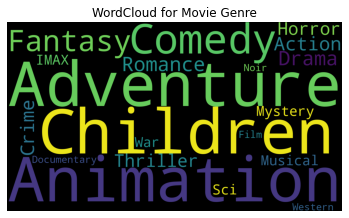

In [34]:
plt.axis('off')
plt.title("WordCloud for Movie Genre")
plt.imshow(wordCloud_genre)
plt.show()        

In [37]:
movies_ratings = pd.merge(ratings,movies,on='movieId')
movies_ratings.drop('timestamp', axis=1, inplace=True)
movies_ratings

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama
...,...,...,...,...,...
105329,668,140098,2.5,Runoff (2015),Drama
105330,668,140816,2.5,Tangerine (2015),Comedy|Drama
105331,668,141472,2.5,The 50 Year Argument (2014),(no genres listed)
105332,668,142488,4.0,Spotlight (2015),Thriller


In [38]:
#Higest Rated Movies
top_movies = movies_ratings[['title', 'rating']].groupby('title').sum().sort_values('rating', ascending=False).head(10)
top_movies

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


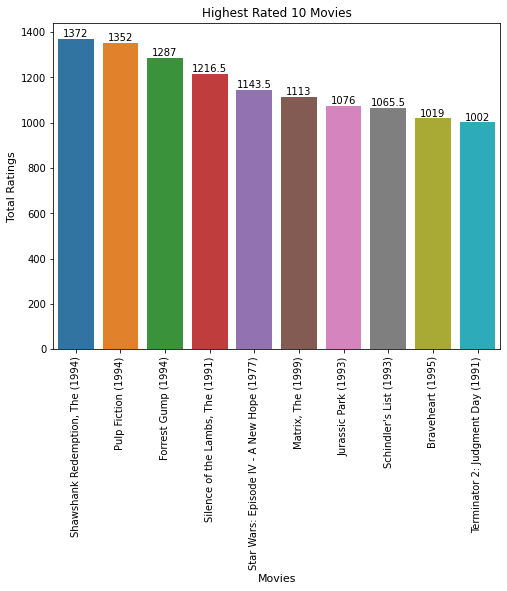

In [39]:
plt.figure(figsize=(8,6))
c1 = sns.barplot(x=top_movies.index, y='rating', data=top_movies, palette=sns.color_palette('tab10', 10))
c1.bar_label(c1.containers[0])
plt.xticks(rotation=90)
plt.title("Highest Rated 10 Movies")
plt.ylabel("Total Ratings", fontsize=11)
plt.xlabel("Movies", fontsize=11)
plt.show()

In [40]:
#Most Rated Movies
top_rated_movies = movies_ratings[['title', 'userId']].groupby('title').count().sort_values('userId', ascending=False).head(10)
top_rated_movies

,userId
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290
Star Wars: Episode IV - A New Hope (1977),273
"Matrix, The (1999)",261
Terminator 2: Judgment Day (1991),253
Braveheart (1995),248


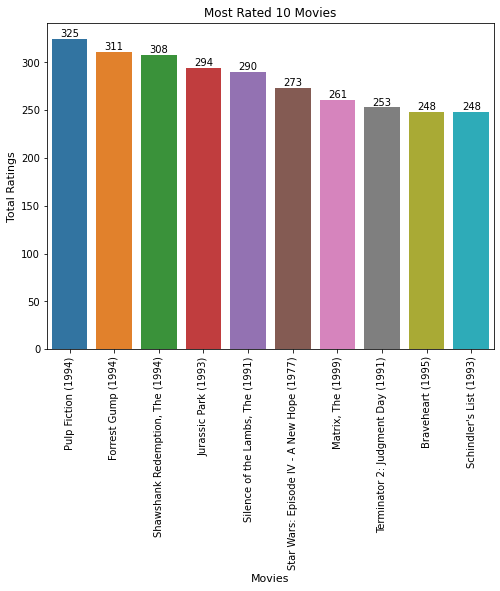

In [41]:
plt.figure(figsize=(8,6))
c1 = sns.barplot(x=top_rated_movies.index, y='userId', data=top_rated_movies, palette='tab10')
c1.bar_label(c1.containers[0])
plt.xticks(rotation=90)
plt.title("Most Rated 10 Movies")
plt.ylabel("Total Ratings", fontsize=11)
plt.xlabel("Movies", fontsize=11)
plt.show()

In [42]:
#Average Rating of a Movie
movie_avg_rating = movies_ratings[['title', 'rating']].groupby('title').mean()
movie_avg_rating['number_of_ratings'] = movies_ratings[['title', 'userId']].groupby('title').count()
movie_avg_rating


,rating,number_of_ratings
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
...,...,...
loudQUIETloud: A Film About the Pixies (2006),4.500000,1
xXx (2002),2.958333,24
xXx: State of the Union (2005),2.071429,7


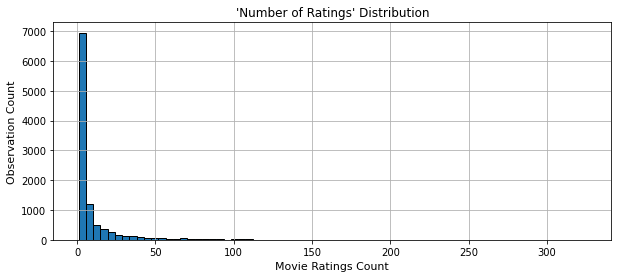

In [43]:
plt.figure(figsize=(10,4))
plt.title("'Number of Ratings' Distribution")
movie_avg_rating['number_of_ratings'].hist(bins=70, edgecolor='black')
plt.ylabel("Observation Count", fontsize=11)
plt.xlabel("Movie Ratings Count", fontsize=11)
plt.show()

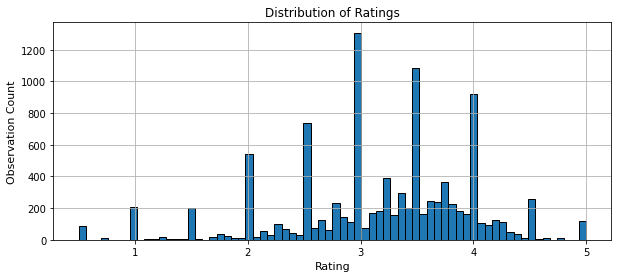

In [44]:
#Inference:

#Most Movies are rated by less than 50 people.
plt.figure(figsize=(10,4))
plt.title("Distribution of Ratings")
movie_avg_rating['rating'].hist(bins=70, edgecolor='black')
plt.ylabel("Observation Count", fontsize=11)
plt.xlabel("Rating", fontsize=11)
plt.show()

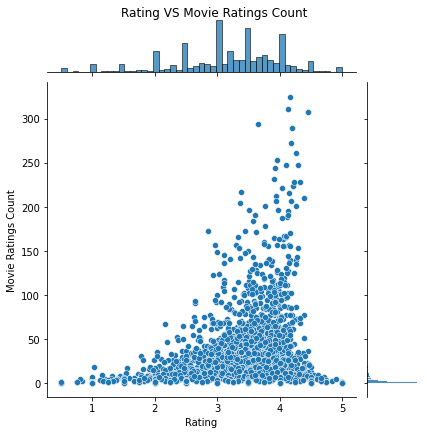

In [45]:
p1 = sns.jointplot(x='rating', y='number_of_ratings', data=movie_avg_rating)
p1.set_axis_labels("Rating", "Movie Ratings Count")
plt.suptitle("Rating VS Movie Ratings Count", y=1.0)
plt.show()

In [46]:
#Recommender System
moviemat = movies_ratings.pivot_table(index='userId',columns='title',values='rating')
moviemat.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,2.5,NaN,NaN,NaN,2.0,NaN,3.0,2.5,...,NaN,1.5,0.5,NaN,2.0,NaN,3.5,NaN,2.0,3.0


In [47]:
movie_avg_rating.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


In [48]:
#We Choosed "Jurassic Park (1993)" and "Star Wars: Episode IV - A New Hope (1977)""
# Now let's grab the user ratings for those two movies:
jurassicPark1993_user_ratings = moviemat['Jurassic Park (1993)']
starWars1977_user_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']
starWars1977_user_ratings

userId
1      4.5
2      4.0
3      NaN
4      NaN
5      NaN
      ... 
664    3.0
665    3.0
666    5.0
667    NaN
668    3.0
Name: Star Wars: Episode IV - A New Hope (1977), Length: 668, dtype: float64

In [49]:
# corrwith: Compute pairwise correlation between rows or columns of DataFrame with rows or columns of Series or DataFrame.
jurassicPark1993_similar = moviemat.corrwith(jurassicPark1993_user_ratings)
starWars1977_similar = moviemat.corrwith(starWars1977_user_ratings)

C:\Users\admin\miniconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\admin\miniconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\admin\miniconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\admin\miniconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [50]:
corr_jurassicPark1993 = pd.DataFrame(jurassicPark1993_similar, columns=['Correlation'])
corr_jurassicPark1993.dropna(inplace=True)
corr_jurassicPark1993 = corr_jurassicPark1993.join(movie_avg_rating['number_of_ratings'])
corr_jurassicPark1993.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",0.635632,20
(500) Days of Summer (2009),-0.178492,37
*batteries not included (1987),0.325396,11
...And Justice for All (1979),-0.182574,10


In [51]:
corr_jurassicPark1993.sort_values('Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Castle, The (1997)",1.0,7
Hero at Large (1980),1.0,2
Speechless (1994),1.0,6
"Specials, The (2000)",1.0,2
Sonatine (Sonachine) (1993),1.0,5
Solomon Kane (2009),1.0,4
"I Love You, Beth Cooper (2009)",1.0,2
I'll Be Home For Christmas (1998),1.0,3
Birth (2004),1.0,3


In [52]:
#Final Result
corr_jurassicPark1993[corr_jurassicPark1993['number_of_ratings']>50].sort_values('Correlation', ascending=False).head()

,Correlation,number_of_ratings
title,,
Jurassic Park (1993),1.000000,294
District 9 (2009),0.606217,55
Arachnophobia (1990),0.601856,68
"Lost World: Jurassic Park, The (1997)",0.567469,73
Lethal Weapon 2 (1989),0.565466,65


In [53]:
#Similarly, Recommendation for "Star Wars: Episode IV - A New Hope (1977)"
corr_starWars1977 = pd.DataFrame(starWars1977_similar, columns=['Correlation'])
corr_starWars1977.dropna(inplace=True)
corr_starWars1977 = corr_starWars1977.join(movie_avg_rating['number_of_ratings'])
corr_starWars1977[corr_starWars1977['number_of_ratings']>50].sort_values('Correlation', ascending=False).head()

,Correlation,number_of_ratings
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,273
Star Wars: Episode V - The Empire Strikes Back (1980),0.725627,228
Star Wars: Episode VI - Return of the Jedi (1983),0.657868,222
Little Women (1994),0.624075,54
Dave (1993),0.587819,88
